# Lab 4: Resampling Methods!

## Problem 5

### a.) Creating a Logistic Model for Default, based on Income and Balance

In [1]:
library(ISLR)
attach(Default)
set.seed(1)

In [2]:
# some information about names
names(Default)
dim(Default)

[1] "default" "student" "balance" "income"

[1] 10000     4

In [3]:
#make a logistic model based on income and balance (remember to include family='binomial' to reduce anger and stress)
logModelA = glm(default~income+balance, data=Default, family='binomial')
logModelA


Call:  glm(formula = default ~ income + balance, family = "binomial", 
    data = Default)

Coefficients:
(Intercept)       income      balance  
 -1.154e+01    2.081e-05    5.647e-03  

Degrees of Freedom: 9999 Total (i.e. Null);  9997 Residual
Null Deviance:	    2921 
Residual Deviance: 1579 	AIC: 1585

### b.) Estimating Test Error of Model Using Validation Set

In [4]:
#We want to split our data into training and testing.
trainIndices = sample(10000, 7000)
trainSet = Default[trainIndices,]
testSet = Default[-trainIndices,]
# for checks
trainSet[0:5,]
testSet[0:5,]
dim(trainSet)
dim(testSet)

,default,student,balance,income
2656,No,Yes,80.59568,16145.64
3721,No,Yes,1470.47459,18621.17
5728,No,Yes,1150.54719,23705.95
9080,Yes,No,1856.91472,33445.62
2017,No,Yes,689.51920,15600.05


,default,student,balance,income
1,No,No,729.5265,44361.63
3,No,No,1073.5492,31767.14
4,No,No,529.2506,35704.49
10,No,No,0.0000,29275.27
17,No,No,0.0000,50265.31


[1] 7000    4

[1] 3000    4

In [5]:
# Fit a logistic model with just train
logModelJustTrain = glm(default~income+balance, data=trainSet, family='binomial')
logModelJustTrain.probs=predict(logModelJustTrain, testSet, type='response') #run the values through the model
logModelJustTrain.preds=rep(0, dim(testSet)[1]) #create a vector of 'No's'
logModelJustTrain.preds[logModelJustTrain.preds>.5]=1 #change any probabilities greater than .5 to 'yes'

In [6]:
#print out the result of our predictions.
result = data.frame(logModelJustTrain.probs, logModelJustTrain.preds, testSet['default'])
result[0:10,]

,logModelJustTrain.probs,logModelJustTrain.preds,default
1,1.346030e-03,0,No
3,7.497860e-03,0,No
4,3.518271e-04,0,No
10,1.435567e-05,0,No
17,2.241233e-05,0,No
25,1.401457e-03,0,No
34,4.110772e-03,0,No
43,1.481640e-02,0,No
44,3.953969e-05,0,No
46,2.594807e-04,0,No


In [7]:
#Change default to map to 0 if no default, 1 to yes default
dflt = rep(1:length(default))
dflt[default=='No'] = 0
dflt[default=='Yes'] = 1

In [8]:
#This is the MSE (mean squared error)
mean((dflt[-trainIndices]-logModelJustTrain.preds^2))

[1] 0.033

### c.) Repeat with different test sets.

In [9]:
# Here, I create 100 different test sets and run logistic models for all of them
y1 = rep(1:100)
for (i in 1:100) {
    set.seed(i)
    trainIndices = sample(10000, 7000)
    trainSet = Default[trainIndices,]
    testSet = Default[-trainIndices,]

    logModelJustTrain = glm(default~income+balance, data=trainSet, family='binomial')
    logModelJustTrain.probs=predict(logModelJustTrain, testSet, type='response') #run the values through the model
    logModelJustTrain.preds=rep(0, dim(testSet)[1]) #create a vector of 'No's'
    logModelJustTrain.preds[logModelJustTrain.preds>.5]=1 #change any probabilities greater than .5 to 'yes'


    y1[i] = (mean((dflt[-trainIndices]-logModelJustTrain.preds^2))) #MSE
    }
y1[0:5] #print out first 5 values
mean(y1) #mean of means

[1] 0.03300000 0.03100000 0.02700000 0.03100000 0.03166667

[1] 0.03284333

Clearly, as we vary the training set values, we will get different MSE values, but they all seem to be around ~.0328. 

### d.) Do the same, but considering 'student' as a predictor.

In [10]:
y2 = rep(1:100)
for (i in 1:100) {
    set.seed(i + 100)
    trainIndices2 = sample(10000, 7000)
    trainSet2 = Default[trainIndices2,]
    testSet2 = Default[-trainIndices2,]

    logModelJustTrain2 = glm(default~income+balance+student, data=trainSet2, family='binomial') #this time we add student
    logModelJustTrain2.probs=predict(logModelJustTrain2, testSet2, type='response') #run the values through the model
    logModelJustTrain2.preds=rep(0, dim(testSet2)[1]) #create a vector of 'No's'
    logModelJustTrain2.preds[logModelJustTrain2.preds>.5]=1 #change any probabilities greater than .5 to 'yes'


    y2[i]= (mean((dflt[-trainIndices2]-logModelJustTrain2.preds^2))) #MSE
    }
y2[0:5]
mean(y2) #mean of the mean
sqrt((mean(y2) - mean(y1))^2) #The difference in MSEs (from including student vs not including student)

[1] 0.03700000 0.03166667 0.03300000 0.03133333 0.03266667

[1] 0.03319333

[1] 0.00035

The difference is extremely slight, but adding the student as a predictor increased the MSE by 0.0003499. To me, it doesn't seem like there would be a difference in adding or not adding 'student', but Occam's Razor tells us not to add it (and AIC/BIC too, I guess..)

## Problem 8

We will now perform cross-validation on a simulated data set.

In [11]:
set.seed(1)
x=rnorm(100)
y=x-2*x^2+rnorm(100)

In [12]:
#for checks
data = data.frame(y, x)
data[0:5,]
dim(data)

y,x
-2.0317092,-0.6264538
0.1583095,0.1836433
-3.1431006,-0.8356286
-3.3365321,1.5952808
-0.5422276,0.3295078


[1] 100   2

a.) We are working with a 100x2 dataset, as seen the checks above. 
$$Y = B_0 + B_1X_1$$

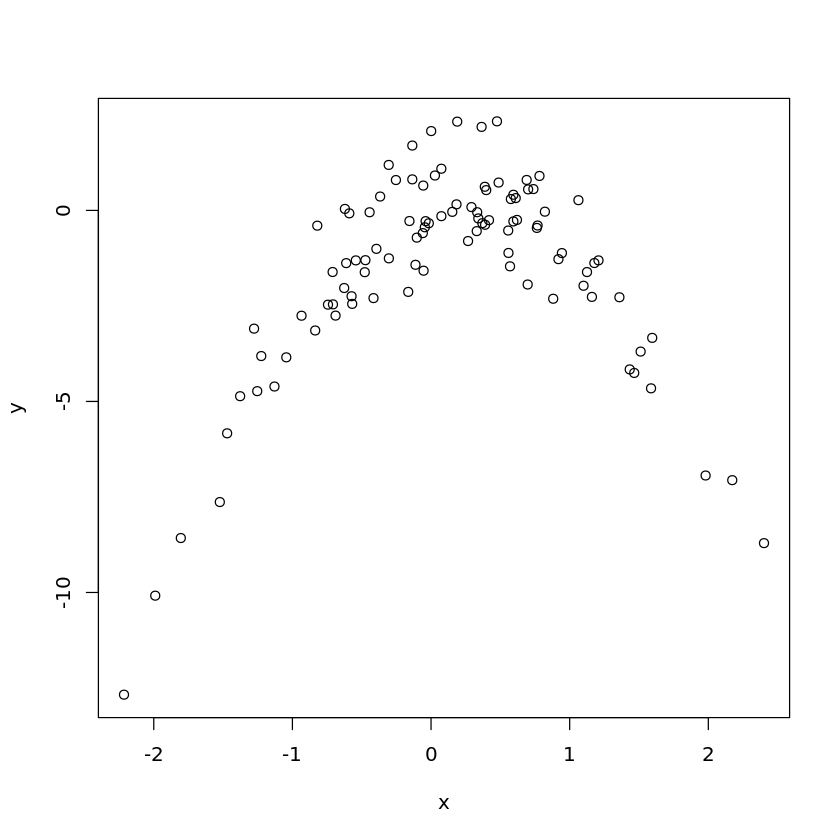

In [13]:
plot(x, y)

b.) This looks like a typical downward parabola with noise!

In [14]:
library(boot)
set.seed(37)

We will fit the following models:
$$\text{1.) Y} = \beta_0 + \beta_1X + \varepsilon$$

$$\text{2.) Y} = \beta_0 + \beta_1X + \beta_2X^2 + \varepsilon$$

$$\text{3.) Y} = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \varepsilon$$

$$\text{4.) Y} = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \beta_4X^4 + \varepsilon$$

In [15]:
#Create the models based on different degrees.
lm.1 = glm(y~x, data=data)
lm.2 = glm(y~x+I(x^2), data=data)
lm.3 = glm(y~x+I(x^2)+I(x^3), data=data)
# lm.4.1 = glm(y~poly(x, 4), data=data) this is same as below.
lm.4 = glm(y~x+I(x^2)+I(x^3)+I(x^4), data=data)

#Do K=N (LOOCV) on each model
cv.1 = cv.glm(data, lm.1)
cv.2 = cv.glm(data, lm.2)
cv.3 = cv.glm(data, lm.3)
cv.4 = cv.glm(data, lm.4)

#Print out the MSE for each cross validation
print (cv.1$delta[1])
print (cv.2$delta[1])
print (cv.3$delta[1])
print (cv.4$delta[1])

[1] 7.288162
[1] 0.9374236
[1] 0.9566218
[1] 0.9539049


c.) I'm gonna be completely honest here, I sat here for 20 minutes wondering why my MSE for my first model was so high. HAHAHAHA because the model is __A POLYNOMIAL__ what a surprise!!! But at the same time, I expected my 2 order model to have the lowest error, which it did. I just got really distracted by the large difference between my first model and the rest of them. I need to sleep.

In [16]:
set.seed(39)
#Create the models based on different degrees.
lm.1 = glm(y~x, data=data)
lm.2 = glm(y~x+I(x^2), data=data)
lm.3 = glm(y~x+I(x^2)+I(x^3), data=data)
# lm.4.1 = glm(y~poly(x, 4), data=data) this is same as below.
lm.4 = glm(y~x+I(x^2)+I(x^3)+I(x^4), data=data)

#Do K=N (LOOCV) on each model
cv.1 = cv.glm(data, lm.1)
cv.2 = cv.glm(data, lm.2)
cv.3 = cv.glm(data, lm.3)
cv.4 = cv.glm(data, lm.4)

#Print out the MSE for each cross validation
print (cv.1$delta[1])
print (cv.2$delta[1])
print (cv.3$delta[1])
print (cv.4$delta[1])

[1] 7.288162
[1] 0.9374236
[1] 0.9566218
[1] 0.9539049


d.) Because of the nature of cross validation, we should get the same results for the MSE, regardless of what seed we use. We're looking at the entire data set and taking an average of all of the different train/test combinations. Unless we change the value of K, we should always get the same values.

e.) Again, we should expect polynomial degree 2 to have the lowest MSE, since the original dataset was based on a X^2 factor. This was verified through the cross validation MSE, which was the lowest at polynomial degree 2.

In [17]:
print('X P-VALUES')
coef(summary(lm.1))[1, 4] #p value of intercept
coef(summary(lm.1))[2, 4] # x

print('X^2 P-VALUES')
coef(summary(lm.2))[1, 4] #p value of intercept
coef(summary(lm.2))[2, 4] # x
coef(summary(lm.2))[3, 4] # x^2

print('X^3 P-VALUES')
coef(summary(lm.3))[1, 4] #p value of intercept
coef(summary(lm.3))[2, 4] # x
coef(summary(lm.3))[3, 4] # x^2
coef(summary(lm.3))[4, 4] # x^3

print('X^4 P-VALUES')
coef(summary(lm.4))[1, 4] #p value of intercept
coef(summary(lm.4))[2, 4] # x
coef(summary(lm.4))[3, 4] # x^2
coef(summary(lm.4))[4, 4] # x^3
coef(summary(lm.4))[5, 4] # x^4

[1] "X P-VALUES"


[1] 1.3093e-08

[1] 0.01923846

[1] "X^2 P-VALUES"


[1] 0.6308613

[1] 2.403287e-15

[1] 4.58433e-44

[1] "X^3 P-VALUES"


[1] 0.6079538

[1] 1.08935e-06

[1] 5.873444e-43

[1] 0.784399

[1] "X^4 P-VALUES"


[1] 0.2640034

[1] 5.174326e-07

[1] 4.575229e-17

[1] 0.8922288

[1] 0.1930956

f.) Yup! The 2nd order model also has the lowest (best) p-values also. It seems like the x-intercept isn't particularly significant, but for the $x^2$ orders and above, the $x^2$ term is also the highest. Everything agrees and works out!